<a href="https://colab.research.google.com/github/rushikesh648/pw-skills-assignment/blob/main/eda_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA-1 DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
#q1 What is the range of selling prices in the dataset
df = df.sort_values(by='selling_price')
df = range(df['selling_price'].min(),df['selling_price'].max())
df

range(5000, 760000)

In [ ]:
#q2 What is the median selling price for bikes in the dataset
df=pd.read_csv("BIKE DETAILS.csv")
df['selling_price'].median()

45000.0

In [ ]:
#q3 What is the most common seller type
df['seller_type'].mode()
df.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
#q4 How many bikes have driven more than 50,000 kilometers
df[df['km_driven']>50000].count()

,0
name,170
selling_price,170
year,170
seller_type,170
owner,170
km_driven,170
ex_showroom_price,88


In [ ]:
#q5 What is the average km_driven value for each ownership type
df.groupby('owner').km_driven.mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
#q6 What proportion of bikes are from the year 2015 or older
df[df['year']>=2015].count()

,0
name,560
selling_price,560
year,560
seller_type,560
owner,560
km_driven,560
ex_showroom_price,375


In [ ]:
#q7 What is the trend of missing values across the dataset
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
#q8 What is the highest ex_showroom_price recorded, and for which bike
df=pd.read_csv("BIKE DETAILS.csv")
df


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
df.iloc[[295]]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
295,Suzuki GSX S750,760000,2019,Individual,1st owner,2800,752020.0


In [ ]:
#q9 What is the total number of bikes listed by each seller type
df.groupby('seller_type').count()

,name,selling_price,year,owner,km_driven,ex_showroom_price
seller_type,,,,,,
Dealer,6,6,6,6,6,3
Individual,1055,1055,1055,1055,1055,623


In [ ]:
#q10  What is the relationship between selling_price and km_driven for first-owner bikes
df.groupby('owner').km_driven.mean()
df.groupby('owner').selling_price.mean()
df.groupby('owner').km_driven.mean()/df.groupby('owner').selling_price.mean()

,0
owner,
1st owner,0.546735
2nd owner,0.705790
3rd owner,0.597413
4th owner,2.632394


In [ ]:
#q11 Identify and remove outliers in the km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
df = df.drop(outliers.index)
print(df)

                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner

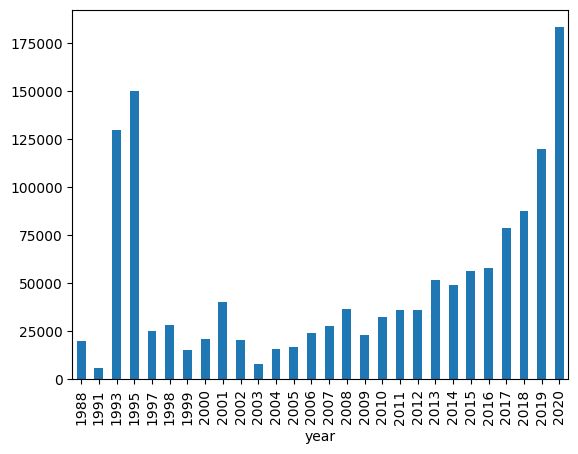

In [ ]:
#q12 Perform a bivariate analysis to visualize the relationship between year and selling_price
df.groupby('year').selling_price.mean()
df.groupby('year').selling_price.mean().plot(kind='bar')
plt.show()

In [ ]:
#q13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
import datetime
current_year = datetime.datetime.now().year
df['age'] = current_year - df['year']
df['depreciation'] = df['selling_price'] / df['age']
average_depreciation = df['depreciation'].mean()

print(f"The average depreciation in selling price based on the bike's age is {average_depreciation:.2f} per year.")

The average depreciation in selling price based on the bike's age is 7175.01 per year.


In [ ]:
#q14 Which bike names are priced significantly above the average price for their manufacturing year
df.sort_values(by='selling_price',ascending=False)
df.groupby('year')['selling_price'].mean().sort_values(ascending=False)
df.groupby('name')['selling_price'].mean().sort_values(ascending=False)
df.groupby('name').filter(lambda x: x['selling_price'].mean() > df['selling_price'].mean())

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,depreciation
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6,29166.666667
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,21428.571429
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10,6500.000000
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,7,11214.285714
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,17,10588.235294
...,...,...,...,...,...,...,...,...,...
998,Honda CB Hornet 160R,60000,2018,Individual,1st owner,15000,87000.0,7,8571.428571
1000,Honda CBR 150,60000,2015,Individual,1st owner,32000,120000.0,10,6000.000000
1007,Yamaha FZ S V 2.0,55000,2017,Individual,1st owner,58000,84000.0,8,6875.000000
1017,Yamaha FZ S V 2.0,48000,2017,Individual,1st owner,23000,84000.0,8,6000.000000


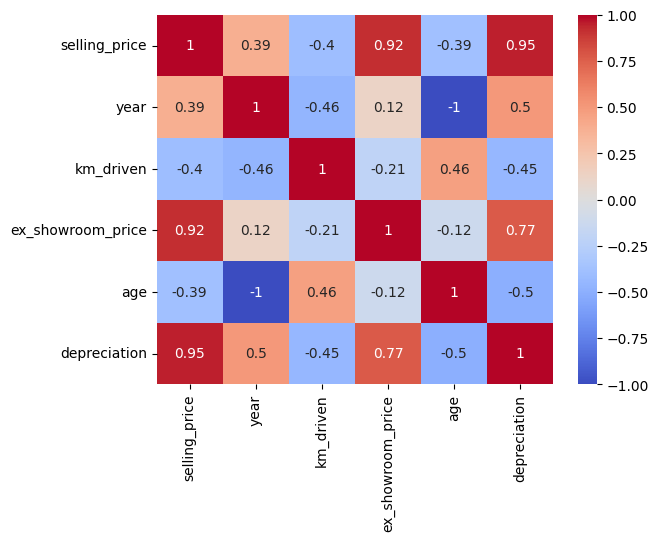

In [ ]:
#q15  Develop a correlation matrix for numeric columns and visualize it using a heatmap
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

EDA-2 DATASET

In [ ]:
df = pd.read_csv('Car Sale.csv')
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import plotly.express as px

In [ ]:
#q1 What is the average selling price of cars for each dealer, and how does it compare across different dealers
df.agg('Price ($)').mean()
df.groupby('Dealer_Name').agg('Price ($)').mean()




,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


In [ ]:
#q2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
df.groupby('Company').agg('Price ($)').std()
df.groupby('Company').agg('Price ($)').std().sort_values(ascending=False)

,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


In [ ]:
#q3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
df.groupby('Transmission').agg('Price ($)').describe()
df.groupby('Transmission').agg('Price ($)').describe()['75%'] - df.groupby('Transmission').agg('Price ($)').describe()['25%']
df.groupby('Transmission').agg('Price ($)').describe()['75%'] / df.groupby('Transmission').agg('Price ($)').describe()['25%']
df.groupby('Transmission').agg('Price ($)').describe()['max'] - df.groupby('Transmission').agg('Price ($)').describe()['min']
df.range = df.groupby('Transmission').agg('Price ($)').describe()['max'] - df.groupby('Transmission').agg('Price ($)').describe()['min']
df.range.sort_values(ascending=False)

,0
Transmission,
Manual,84100.0
Auto,74500.0


In [ ]:
#q4  What is the distribution of car prices across different regions
df.groupby('Dealer_Region').agg('Price ($)').describe()
df.groupby('Dealer_Region').agg('Price ($)').describe()['75%'] - df.groupby('Dealer_Region').agg('Price ($)').describe()['25%']
df.groupby('Dealer_Region').agg('Price ($)').describe()['75%'] / df.groupby('Dealer_Region').agg('Price ($)').describe()['25%']
df.groupby('Dealer_Region').agg('Price ($)').describe()['max'] - df.groupby('Dealer_Region').agg('Price ($)').describe()['min']


,0
Dealer_Region,
Aurora,76800.0
Austin,76601.0
Greenville,84000.0
Janesville,81100.0
Middletown,83600.0
Pasco,76600.0
Scottsdale,83551.0


In [ ]:
#q5  What is the distribution of cars based on body styles
df.groupby('Body Style').count()
df.groupby('Body Style').count().sort_values(by='Price ($)',ascending=False)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Phone,Dealer_Region
Body Style,,,,,,,,,,,,,,,
SUV,6374,6374,6374,6374,6374,6374,6374,6374,6374,6374,6374,6374,6374,6374,6374
Hatchback,6128,6128,6128,6128,6128,6128,6128,6128,6128,6128,6128,6128,6128,6128,6128
Sedan,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488
Passenger,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945
Hardtop,2971,2971,2970,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971


In [ ]:
#q6  How does the average selling price of cars vary by customer gender and annual income
df.groupby('Gender').agg('Price ($)').mean()
df.groupby('Annual Income').agg('Price ($)').mean()


,Price ($)
Annual Income,
10080,22801.000000
13500,27878.981415
24000,61001.000000
85000,43000.000000
106000,46001.000000
...,...
6600000,39000.000000
6800000,15000.000000
7650000,21000.000000


In [ ]:
#q7  What is the distribution of car prices by region, and how does the number of cars sold vary by region
df.groupby('Dealer_Region').agg('Price ($)').describe()
df.groupby('Dealer_Region').count()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone
Dealer_Region,,,,,,,,,,,,,,,
Aurora,3130,3130,3129,3130,3130,3130,3130,3130,3130,3130,3130,3130,3130,3130,3130
Austin,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135,4135
Greenville,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128
Janesville,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821,3821
Middletown,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128
Pasco,3131,3131,3131,3131,3131,3131,3131,3131,3131,3131,3131,3131,3131,3131,3131
Scottsdale,3433,3433,3433,3433,3433,3433,3433,3433,3433,3433,3433,3433,3433,3433,3433


In [ ]:
#q8  How does the average car price differ between cars with different engine sizes
df.groupby('Engine').agg('Price ($)').mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


In [ ]:
#q9  How do car prices vary based on the customer’s annual income bracket
df.groupby('Annual Income').agg('Price ($)').mean()

,Price ($)
Annual Income,
10080,22801.000000
13500,27878.981415
24000,61001.000000
85000,43000.000000
106000,46001.000000
...,...
6600000,39000.000000
6800000,15000.000000
7650000,21000.000000


In [ ]:
#q19 What are the top 5 car models with the highest number of sales, and how does their price distribution look
df.groupby('Model').count().sort_values(by='Price ($)',ascending=False)
df.groupby('Model').count().sort_values(by='Price ($)',ascending=False).head(5)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Model,,,,,,,,,,,,,,,
Diamante,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418
Silhouette,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411
Prizm,411,411,411,411,411,411,411,411,411,411,411,411,411,411,411
Passat,391,391,391,391,391,391,391,391,391,391,391,391,391,391,391
Ram Pickup,383,383,382,383,383,383,383,383,383,383,383,383,383,383,383


In [ ]:
#q11  How does car price vary with engine size across different car colors, and which colors have the highest price variation
df.groupby('Color').agg('Price ($)').std()
df.groupby('Color').agg('Price ($)').std().sort_values(ascending=False)

,Price ($)
Color,
Red,15519.360962
Black,15286.065976
Pale White,14077.346859


In [ ]:
#q12  Is there any seasonal trend in car sales based on the date of sale
df.groupby('Date').count()

,Car_id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Date,,,,,,,,,,,,,,,
1/10/2022,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1/10/2023,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
1/11/2023,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
1/12/2022,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
1/13/2022,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/6/2023,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
9/7/2022,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
9/8/2022,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


In [ ]:
#q13 How does the car price distribution change when considering different combinations of body style and transmission type
df.groupby(['Body Style','Transmission']).agg('Price ($)').describe()

count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          27000.0  43125.0  75501.0  
           Manual        22001.0  29000.0  82500.0  
Hatchback  Auto          21500.0  31000.0  75700.0  
           Manual        23000.0  36001.0  85600.0  
Passenger  Auto          25000.0  38000.0  69801.0  
           Manual        22000.0  37000.0  85800.0  
SUV        Auto          25000.0  33000.0  75501.0  
           Manual        22000.0  28000.0  85500.0  
Sedan      Auto          26000.0  39500.0  69980.0  
           Manual        25000.0  36600.0  69700.0

In [ ]:
#q14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
df.corr(numeric_only=True)


,Annual Income,Price ($),Phone
Annual Income,1.000000,0.012065,-0.000351
Price ($),0.012065,1.000000,-0.000493
Phone,-0.000351,-0.000493,1.000000


In [ ]:
#q15  How does the average car price vary across different car models and engine types
df = pd.read_csv('Car Sale.csv')
df.groupby('Model').agg('Price ($)').mean()
df.groupby('Engine').agg('Price ($)').mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


EDA-3 DATASET

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('amazon.csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [52]:
#q1 What is the average rating for each product category
df[['rating']].groupby('rating').mean()

""
rating
2
2.3
2.6
2.8
2.9
3
3.0
3.1
3.2


In [53]:
#q2 What are the top rating_count products by category
df[['rating_count']].value_counts()

,count
rating_count,
"9,378",9
"18,998",8
"24,269",7
"43,994",6
"20,850",5
...,...
"2,640",1
"2,646",1
"2,664",1


In [54]:
#q3 What is the distribution of discounted prices vs. actual prices
df.groupby('discounted_price').agg('actual_price').describe()

,count,unique,top,freq
discounted_price,,,,
"₹1,043",1,1,"₹1,345",1
"₹1,049",5,4,"₹2,499",2
"₹1,052",1,1,"₹1,790",1
"₹1,055",1,1,"₹1,249",1
"₹1,059",1,1,"₹3,999",1
...,...,...,...,...
₹980,1,1,₹980,1
₹99,15,6,₹999,5
₹998,1,1,"₹2,999",1


In [89]:
#q4  How does the average discount percentage vary across categories
df.groupby('actual_price').agg('discount_percentage').describe()

,count,unique,top,freq
actual_price,,,,
"₹1,000",10,7,85%,3
"₹1,010",1,1,45%,1
"₹1,020",2,2,36%,1
"₹1,052",1,1,15%,1
"₹1,075",1,1,7%,1
...,...,...,...,...
₹980,1,1,0%,1
₹99,3,2,0%,2
₹990,2,2,70%,1


In [90]:
#q5 What are the most popular product names
df[['product_name']].value_counts()

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating",3
"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
"Fire-Boltt Visionary 1.78"" AMOLED Bluetooth Calling Smartwatch with 368*448 Pixel Resolution 100+ Sports Mode, TWS Connection, Voice Assistance, SPO2 & Heart Rate Monitoring",3
...,...
Havells Ventil Air DX 200mm Exhaust Fan (White),1
Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green),1
Havells OFR 13 Wave Fin with PTC Fan Heater 2900 Watts (Black),1


In [92]:
#q6 What are the most popular product keywords
df[['product_id']].value_counts()

,count
product_id,
B077Z65HSD,3
B09KLVMZ3B,3
B098NS6PVG,3
B083342NKJ,3
B082T6V3DT,3
...,...
B07WHS7MZ1,1
B07WHQWXL7,1
B07WHQBZLS,1


In [96]:
#q7 What are the most popular product reviews
df[['review_title']].value_counts()

,count
review_title,
"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.",10
"Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good",8
"Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good",8
"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet",7
"A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",7
...,...
"Good toaster,Seamless. Undoubtedly the best,Good product,Everything,Nice and okayish to use at home.,Value for money,Good pop-up toaster. Bun warmer feature is a nice addition,Wonderful product.",1
"Good tv and features in this budget.,Genuine products,Offers a lot of functionality for 32 inch,Best Buy under Rs. 16000/-,A perfect TV for your room,Super 👌 👍,Nice,It's amazing with this price 15.5K.",1
"Good value for money,Good,Kodak Tv,One side of screen has blacked out,Kodak tv,Remote not working properly,Kodak TV,Kodak Tv",1


In [111]:
#q8  What is the correlation between discounted_price and rating
df = pd.read_csv('amazon.csv')
df[['discounted_price']].corr(numeric_only=True)

""


In [112]:
df[['rating']].corr(numeric_only=True)

""


In [113]:
#q9  What are the Top 5 categories based on the highest rating
df[['rating']].value_counts().head(5)

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,129
4.4,123


In [114]:
#q10 ' Identify any potential areas for improvement or optimization based on the data analysis
df.groupby('rating').count()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
rating,,,,,,,,,,,,,,,
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.8,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2.9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3.0,3,3,3,3,3,3,2,3,3,3,3,3,3,3,3
3.1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3.2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


EDA-4 DATASET

In [115]:
df = pd.read_csv('spotify.csv')
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [117]:
#q1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [119]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
435,True
436,False
437,False
438,False


In [121]:
df.duplicated().sum()

27

array([[<Axes: title={'center': 'Popularity'}>]], dtype=object)

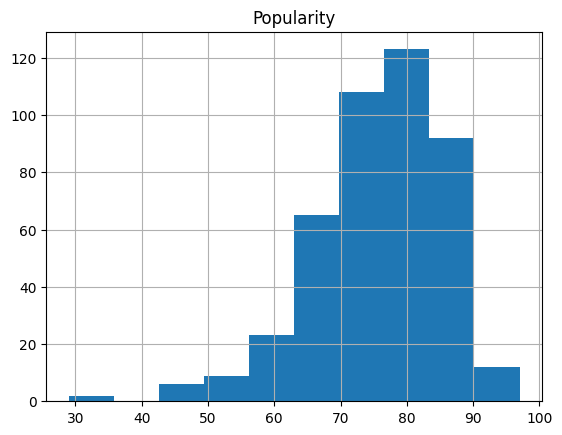

In [123]:
#q2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
df.groupby('Popularity').count()
df.hist(column='Popularity', bins=10)

<Axes: xlabel='Popularity', ylabel='Duration (ms)'>

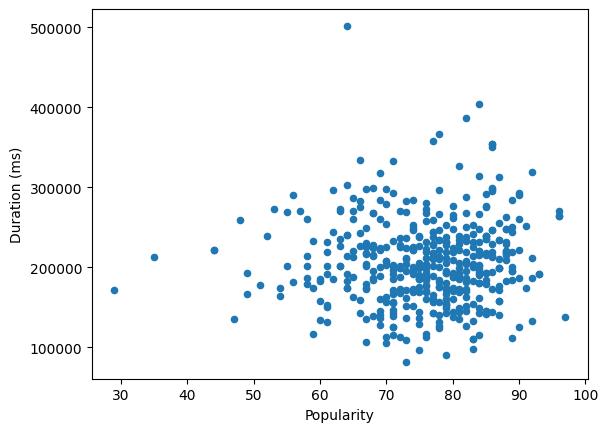

In [125]:
#q3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
df.plot(x='Popularity', y='Duration (ms)', kind='scatter')

<Axes: xlabel='Artist', ylabel='count'>

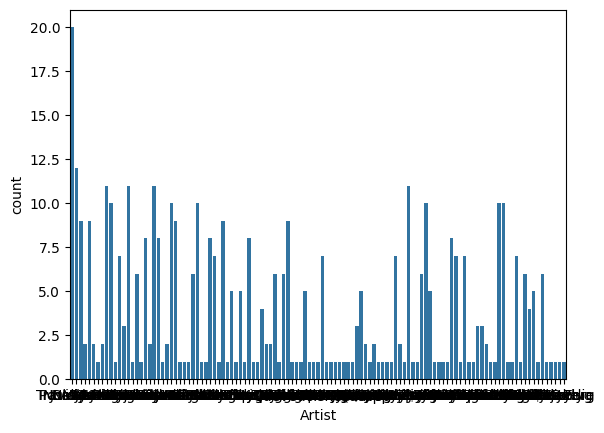

In [127]:
#q4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
df.groupby('Artist').count()
sns.countplot(x='Artist', data=df)

In [128]:
#q5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
df.groupby('Track Name').count().sort_values(by='Popularity',ascending=True).head(5)

,Artist,Popularity,Duration (ms),Track ID
Track Name,,,,
20 Min,1,1,1,1
Rich Baby Daddy (feat. Sexyy Red & SZA),1,1,1,1
Ric Flair Drip (with Metro Boomin),1,1,1,1
Ready or Not,1,1,1,1
Rack City,1,1,1,1


In [129]:
#q6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
df.groupby('Artist').agg('Popularity').mean().sort_values(ascending=False).head(5)

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,87.000000
¥$,86.090909


In [150]:
#q7  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
df = pd.read_csv('spotify.csv')
df.groupby('Artist').agg('Popularity').mean().sort_values(ascending=False).head(5)
df.groupby('Track Name').agg('Popularity').mean().sort_values(ascending=False).head(5)

,Popularity
Track Name,
Lovin On Me,97.0
redrum,96.0
CARNIVAL,96.0
FE!N (feat. Playboi Carti),93.0
Prada,92.0


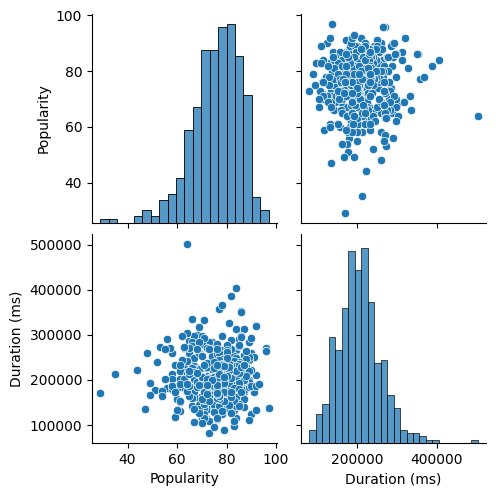

In [151]:
#q8 Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df)

<Axes: xlabel='Artist', ylabel='Duration (ms)'>

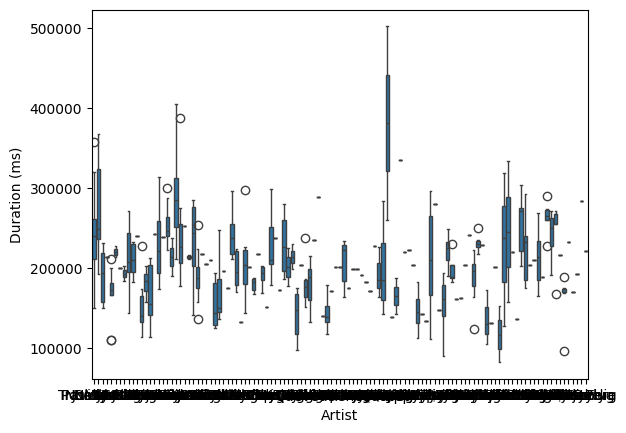

In [152]:
#q9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
sns.boxplot(x='Artist', y='Duration (ms)', data=df)

<Axes: xlabel='Artist', ylabel='Popularity'>

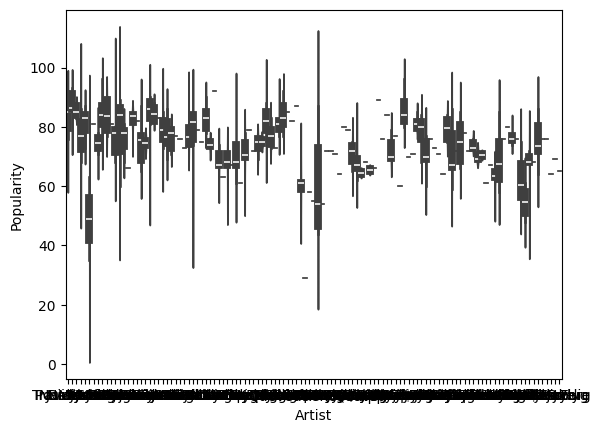

In [153]:
#q10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
sns.violinplot(x='Artist', y='Popularity', data=df)